### Importando libraries

In [114]:
# importing libraries
library(dplyr)

In [115]:
library(tsibble)
library(forecast)
library(ggplot2)

In [116]:
library(fpp3)

### Explorando os dados

In [117]:
# read dataset from csv file
df <- read.csv("../data/Dataset- Superstore (2015-2018).csv")
head(df)

,ï..Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,...,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,1,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,2,CA-2016-152156,2016/11/08,2016/11/11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,3,CA-2016-138688,2016/06/12,2016/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,4,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,5,US-2015-108966,2015/10/11,2015/10/18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,6,CA-2014-115812,2014/06/09,2014/06/14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694


In [118]:
# finding the number of rows and columns
dim(df)

[1] 9994   21

In [119]:
# dataset information
str(df)

'data.frame':	9994 obs. of  21 variables:
 $ ï..Row.ID    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Order.ID     : chr  "CA-2016-152156" "CA-2016-152156" "CA-2016-138688" "US-2015-108966" ...
 $ Order.Date   : chr  "2016/11/08" "2016/11/08" "2016/06/12" "2015/10/11" ...
 $ Ship.Date    : chr  "2016/11/11" "2016/11/11" "2016/06/16" "2015/10/18" ...
 $ Ship.Mode    : chr  "Second Class" "Second Class" "Second Class" "Standard Class" ...
 $ Customer.ID  : chr  "CG-12520" "CG-12520" "DV-13045" "SO-20335" ...
 $ Customer.Name: chr  "Claire Gute" "Claire Gute" "Darrin Van Huff" "Sean O'Donnell" ...
 $ Segment      : chr  "Consumer" "Consumer" "Corporate" "Consumer" ...
 $ Country      : chr  "United States" "United States" "United States" "United States" ...
 $ City         : chr  "Henderson" "Henderson" "Los Angeles" "Fort Lauderdale" ...
 $ State        : chr  "Kentucky" "Kentucky" "California" "Florida" ...
 $ Postal.Code  : int  42420 42420 90036 33311 33311 90032 90032 90032 90032 90032 ...
 $

In [120]:
# dataset summary
summary(df)

   ï..Row.ID      Order.ID          Order.Date         Ship.Date        
 Min.   :   1   Length:9994        Length:9994        Length:9994       
 1st Qu.:2499   Class :character   Class :character   Class :character  
 Median :4998   Mode  :character   Mode  :character   Mode  :character  
 Mean   :4998                                                           
 3rd Qu.:7496                                                           
 Max.   :9994                                                           
  Ship.Mode         Customer.ID        Customer.Name        Segment         
 Length:9994        Length:9994        Length:9994        Length:9994       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                           

In [121]:
# occurences of each datatype
table(sapply(df, class))


character   integer   numeric 
       15         3         3 

In [122]:
# finding the number of unique values in each column
sapply(df, function(x) length(unique(x)))

ï..Row.ID      Order.ID    Order.Date     Ship.Date     Ship.Mode 
         9994          5009          1237          1334             4 
  Customer.ID Customer.Name       Segment       Country          City 
          793           793             3             1           531 
        State   Postal.Code        Region    Product.ID      Category 
           49           631             4          1862             3 
 Sub.Category  Product.Name         Sales      Quantity      Discount 
           17          1850          5825            14            12 
       Profit 
         7287

In [123]:
# finding the number of missing values in each column
sapply(df, function(x) sum(is.na(x)))

ï..Row.ID      Order.ID    Order.Date     Ship.Date     Ship.Mode 
            0             0             0             0             0 
  Customer.ID Customer.Name       Segment       Country          City 
            0             0             0             0             0 
        State   Postal.Code        Region    Product.ID      Category 
            0             0             0             0             0 
 Sub.Category  Product.Name         Sales      Quantity      Discount 
            0             0             0             0             0 
       Profit 
            0

In [124]:
 cat("Total of missing values:", sum(is.na(df)))

Total of missing values: 0

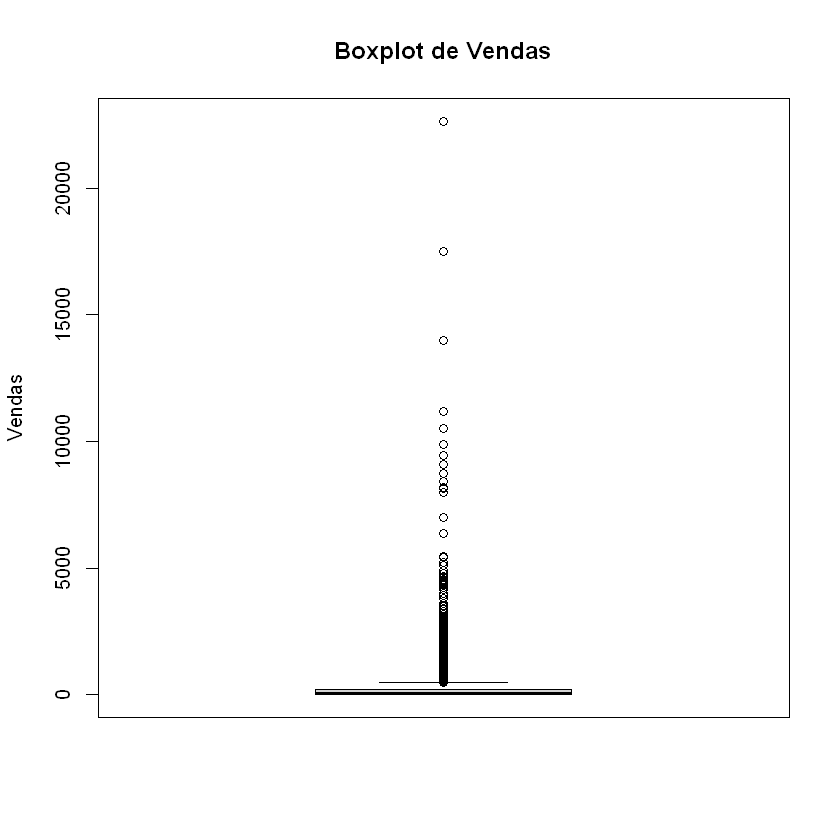

In [125]:
# procurando por outliers em Sales
boxplot(df$Sales, main="Boxplot de Vendas", ylab="Vendas")

In [126]:
# Transformar a coluna "Order.Date" e Ship.Date em objeto de data
df$Order.Date <- as_date(df$Order.Date)
df$Ship.Date <- as_date(df$Ship.Date)



# Verificar e remover linhas duplicadas
dupes <- df %>%
  group_by(Order.ID, Order.Date) %>%
  
  # Contar o número de linhas duplicadas da combinacão de Order.ID e Order.Date
  tally() %>%
  
  # Filtrar apenas as linhas duplicadas - ocorrências maiores que 1
  filter(n > 1)

# Se houver linhas duplicadas, remover as linhas duplicadas
if (nrow(dupes) > 0) {
  print("Linhas duplicadas encontradas:")
  print(dupes)
  df <- df %>%
    # Remover linhas duplicadas - distinct mantém a primeira ocorrência
    distinct(Order.ID, Order.Date, .keep_all = TRUE)
  print("Linhas duplicadas removidas.")
}

# Transformar o data.frame em um objeto tsibble
tsib <- as_tsibble(df, key = Order.ID, index = Order.Date)


[1] "Linhas duplicadas encontradas:"
# A tibble: 2,471 x 3
# Groups:   Order.ID [2,471]
   Order.ID       Order.Date     n
   <chr>          <date>     <int>
 1 CA-2014-100090 2014-07-08     2
 2 CA-2014-100363 2014-04-08     2
 3 CA-2014-100678 2014-04-18     4
 4 CA-2014-100706 2014-12-16     2
 5 CA-2014-100762 2014-11-24     4
 6 CA-2014-100895 2014-06-02     3
 7 CA-2014-100916 2014-10-21     3
 8 CA-2014-101560 2014-11-28     4
 9 CA-2014-101602 2014-12-15     2
10 CA-2014-101931 2014-10-28     5
# i 2,461 more rows
[1] "Linhas duplicadas removidas."


In [127]:
head(tsib)

ï..Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,...,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
<int>,<chr>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
2718,CA-2014-100006,2014-09-07,2014-09-13,Standard Class,DK-13375,Dennis Kane,Consumer,United States,New York City,...,10024,East,TEC-PH-10002075,Technology,Phones,AT&T EL51110 DECT,377.970,3,0.0,109.6113
6288,CA-2014-100090,2014-07-08,2014-07-12,Standard Class,EB-13705,Ed Braxton,Corporate,United States,San Francisco,...,94122,West,FUR-TA-10003715,Furniture,Tables,Hon 2111 Invitation Series Corner Table,502.488,3,0.2,-87.9354
9515,CA-2014-100293,2014-03-14,2014-03-18,Standard Class,NF-18475,Neil FranzÃ¶sisch,Home Office,United States,Jacksonville,...,32216,South,OFF-PA-10000176,Office Supplies,Paper,Xerox 1887,91.056,6,0.2,31.8696
3084,CA-2014-100328,2014-01-28,2014-02-03,Standard Class,JC-15340,Jasper Cacioppo,Consumer,United States,New York City,...,10024,East,OFF-BI-10000343,Office Supplies,Binders,"Pressboard Covers with Storage Hooks, 9 1/2"" x 11"", Light Blue",3.928,1,0.2,1.3257
3836,CA-2014-100363,2014-04-08,2014-04-15,Standard Class,JM-15655,Jim Mitchum,Corporate,United States,Glendale,...,85301,West,OFF-FA-10000611,Office Supplies,Fasteners,Binder Clips by OIC,2.368,2,0.2,0.8288
9441,CA-2014-100391,2014-05-25,2014-05-29,Standard Class,BW-11065,Barry Weirich,Consumer,United States,New York City,...,10035,East,OFF-PA-10001471,Office Supplies,Paper,Strathmore Photo Frame Cards,14.620,2,0.0,6.7252



Autocorrelations of series 'tsib$Sales', by lag

     0      1      2      3      4      5      6      7      8      9     10 
 1.000 -0.014  0.015 -0.016 -0.013  0.000  0.014  0.012 -0.001 -0.001 -0.012 
    11     12     13     14     15     16     17     18     19     20     21 
-0.012 -0.016 -0.002 -0.015 -0.012  0.016 -0.024  0.022 -0.005  0.021  0.009 
    22     23     24     25     26     27     28     29     30     31     32 
 0.005 -0.012 -0.027 -0.018  0.011 -0.011 -0.010 -0.007 -0.013 -0.018  0.011 
    33     34     35     36 
-0.003  0.006 -0.004  0.024 


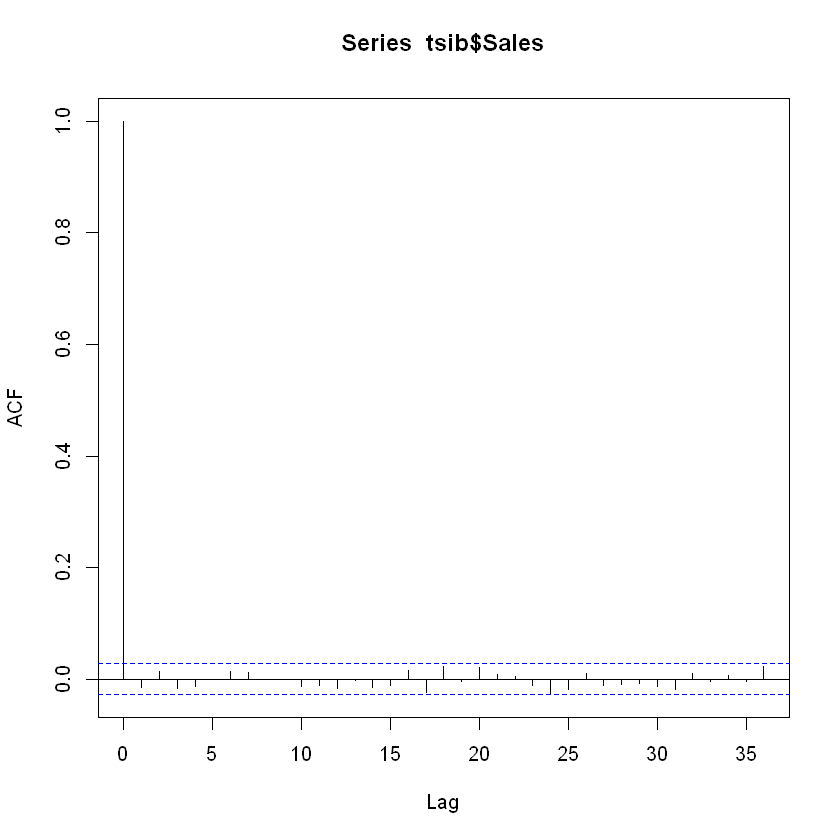

In [128]:
# Plotar a função de autocorrelação
print(acf(tsib$Sales))


In [129]:
# Criar uma nova coluna com o ano e mês
tsib <- tsib %>%

  # multiplicando por 100 pra criar uma valor sequencial
  mutate(year_month = year(Order.Date) * 100 + month(Order.Date))

# Agregar os dados por mês
tsib_monthly <- tsib %>%
  index_by(year_month) %>%
  summarise(Sales = sum(Sales), Quantity = sum(Quantity))

tsib_monthly


year_month,Sales,Quantity
<dbl>,<dbl>,<int>
201401,6417.102,114
201402,1860.736,104
201403,19023.950,250
201404,12415.656,249
201405,15939.349,272
201406,13837.698,275
201407,13562.944,231
201408,14667.032,282
201409,26681.761,491


In [130]:
# Agregar os dados por mês
tsib_monthly <- tsib %>%
  index_by(year_month) %>%
  summarise(Sales = sum(Sales), Quantity = sum(Quantity))
tsib_monthly

year_month,Sales,Quantity
<dbl>,<dbl>,<int>
201401,6417.102,114
201402,1860.736,104
201403,19023.950,250
201404,12415.656,249
201405,15939.349,272
201406,13837.698,275
201407,13562.944,231
201408,14667.032,282
201409,26681.761,491


Warning message in xy.coords(x, y, xlabel, ylabel, log):
"NAs introduzidos por coerção"


ERROR: [1m[33mError[39m in `as.double()`:[22m
[33m![39m Can't convert `x` <lst_mdl> to <double>.


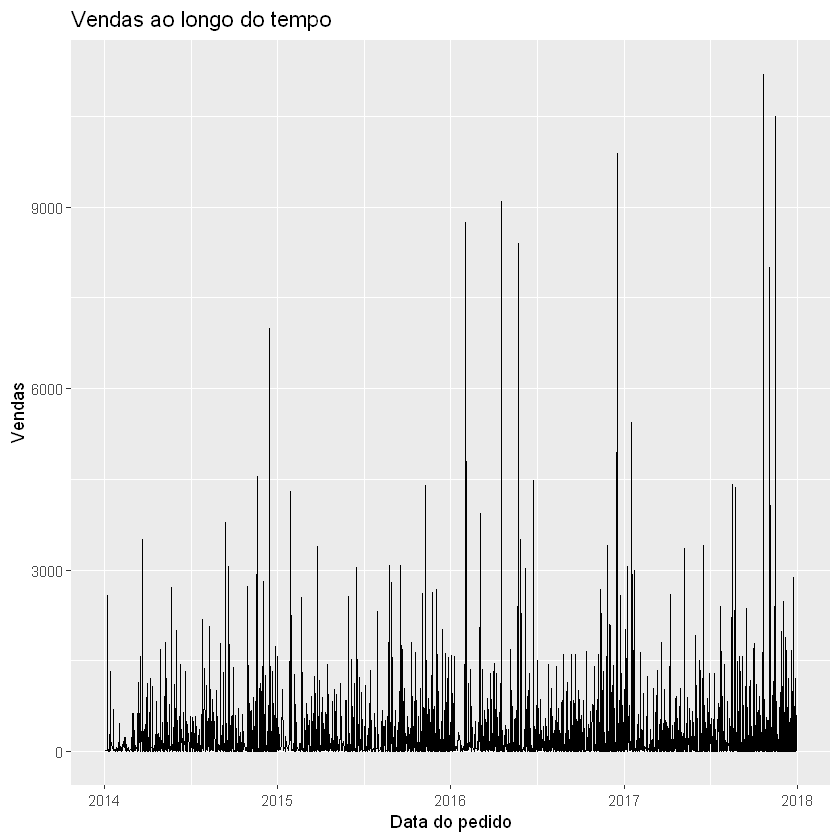

In [131]:
# Plotar a série temporal de vendas
ggplot(tsib, aes(x = Order.Date, y = Sales)) +
  geom_line() +
  labs(title = "Vendas ao longo do tempo",
       x = "Data do pedido",
       y = "Vendas")

# Decompor a série temporal de vendas em tendência, sazonalidade e erro
tsib_decomposed <- tsib %>%
  model(stl = STL(Sales))

# Visualizar a decomposição da série temporal
plot(tsib_decomposed)
